# FASHION-MNIST

## 导包

In [1]:
import torch
import torchvision
from torch.nn import init
import torch.utils.data as data
print(torch.__version__)
print(torchvision.__version__)
print(torch.cuda.is_available())
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

1.0.0
0.2.2
True


## 下载数据

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root='Datasets/FashionMNIST',
                                                train=True,
                                                download=True,
                                                transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='Datasets/FashionMNIST',
                                               train=False,
                                               download=True,
                                               transform=torchvision.transforms.ToTensor())

## 标签类型转换

In [3]:
def get_fashion_mnist_labels(labels):
    """
    FASHION_MNIST数据集的数字标签转文本标签。

    :param labels:数字标签数组，标签取值范围0~9；
    :return:文本标签数组。
    """
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

## 图像预览

In [4]:
def show_fashion_mnist(images, labels):
    """
    批量显示FASHION_MNIST数据集的图像。
    :param images:图像数组，每个图像是一个（Channel=1 x Height x Width）的Tensor。
    :param labels:文本标签数组。
    :return:None
    """
    display.set_matplotlib_formats("svg")
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for ax, img, lbl in zip(axes, images, labels):
        ax.imshow(img.view((28, 28)).numpy(), cmap='gray_r')
        ax.set_title(lbl)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    plt.show()

In [5]:
batch_size = 256
num_workers=4

In [6]:
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

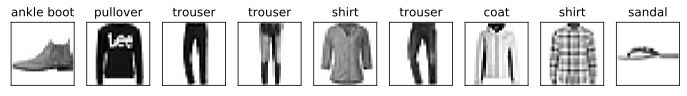

In [7]:
X, y = iter(test_iter).next()
true_labels = get_fashion_mnist_labels(y.numpy())
titles = [lb for lb in true_labels]
show_fashion_mnist(X[0:9], titles[0:9])